## Multiple Linear Regression and Regression Error Metrics

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import csv
from numpy import arange, dtype 
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20) 
pd.options.display.float_format = "{:.3f}".format # to get rid of logarithmic values

## Read Dataset

In [2]:
df = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/ML/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900
...,...,...,...,...
195,38.200,3.700,13.800,7.600
196,94.200,4.900,8.100,9.700
197,177.000,9.300,6.400,12.800
198,283.600,42.000,66.200,25.500


## Data Preparation

In [53]:
df.shape

(200, 4)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [55]:
df.describe()

,TV,radio,newspaper,sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


In [56]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [57]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [58]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

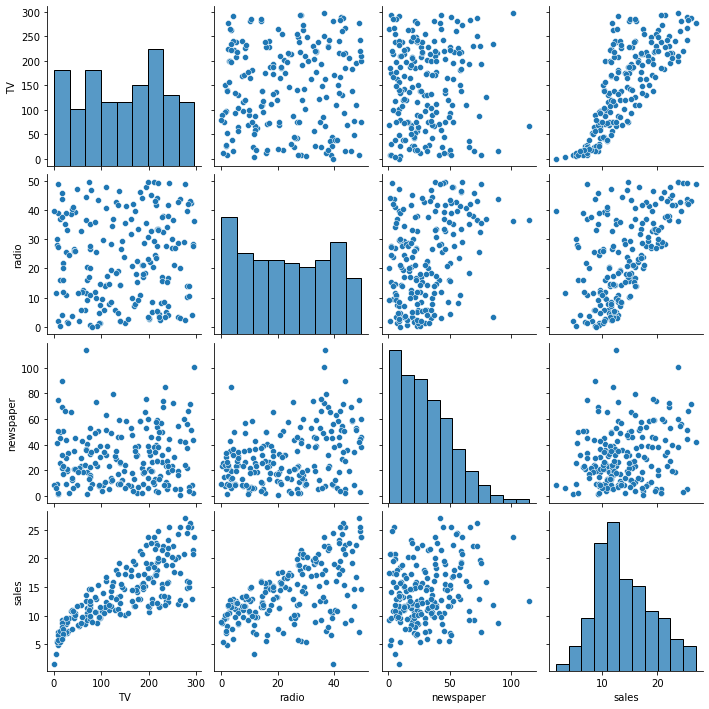

In [59]:
sns.pairplot(df);

In [60]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


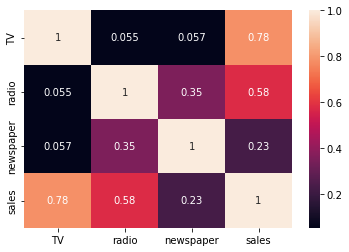

In [61]:
sns.heatmap(df.corr(), annot = True);

## Train-Test Split

In [3]:
# X will be features (inputs) anymore
# y will be the target (outputs) anymore

X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# the data will be trained in the train part
# trained data will be evaluated in the test part
# if you work on the model, you have to choose same random_state
# test_size = 0.3 <==> train_size = 0.7
# if you have less data, you should train more data
# random_state=42 will get the same train and test data every time I use 42.
# when working on the same data, you should enter it the same number for a meaningful comparison.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [6]:
df.sample(15)

,TV,radio,newspaper,sales
61,261.300,42.700,54.700,24.200
69,216.800,43.900,27.200,22.300
13,97.500,7.600,7.200,9.700
108,13.100,0.400,25.600,5.300
36,266.900,43.800,5.000,25.400
85,193.200,18.400,65.700,15.200
152,197.600,23.300,14.200,16.600
50,199.800,3.100,34.600,11.400
174,222.400,3.400,13.100,11.500
195,38.200,3.700,13.800,7.600


We call the predictions we get as a result of x_test as y-pred. Next, we'll compare y-pred with y_test and evaluate metrics like R**2, mae (mean absolute error), and rmse (Root Mean Square Error).

In [7]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [8]:
X_train

,TV,radio,newspaper
169,284.300,10.600,6.400
97,184.900,21.000,22.000
31,112.900,17.400,38.600
12,23.800,35.100,65.900
35,290.700,4.100,8.500
...,...,...,...
106,25.000,11.000,29.700
14,204.100,32.900,46.000
92,217.700,33.500,59.000
179,165.600,10.000,17.600


In [9]:
X_test

,TV,radio,newspaper
95,163.300,31.600,52.900
15,195.400,47.700,52.900
30,292.900,28.300,43.200
158,11.700,36.900,45.200
128,220.300,49.000,3.200
...,...,...,...
73,129.400,5.700,31.300
140,73.400,17.000,12.900
98,289.700,42.300,51.200
172,19.600,20.100,17.000


In [10]:
y_train

169   15.000
97    15.500
31    11.900
12     9.200
35    12.800
       ...  
106    7.200
14    19.000
92    19.400
179   12.600
102   14.800
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [15]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [16]:
# it is the intercept point from the regression equation. When x=0, y equals ...
model.intercept_

2.70894909251591

In [17]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [18]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [19]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [20]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.900,16.565,0.335
15,22.400,21.188,1.212
30,21.400,21.551,-0.151
158,7.300,10.889,-3.589
128,24.700,22.202,2.498
...,...,...,...
73,11.000,9.762,1.238
140,10.900,9.420,1.480
98,25.400,24.255,1.145
172,7.600,7.695,-0.095


In [21]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.900,16.565,0.335
15,22.400,21.188,1.212
30,21.400,21.551,-0.151
158,7.300,10.889,-3.589
128,24.700,22.202,2.498
...,...,...,...
124,19.700,19.768,-0.068
16,12.500,13.775,-1.275
148,10.900,12.496,-1.596
93,22.200,21.535,0.665


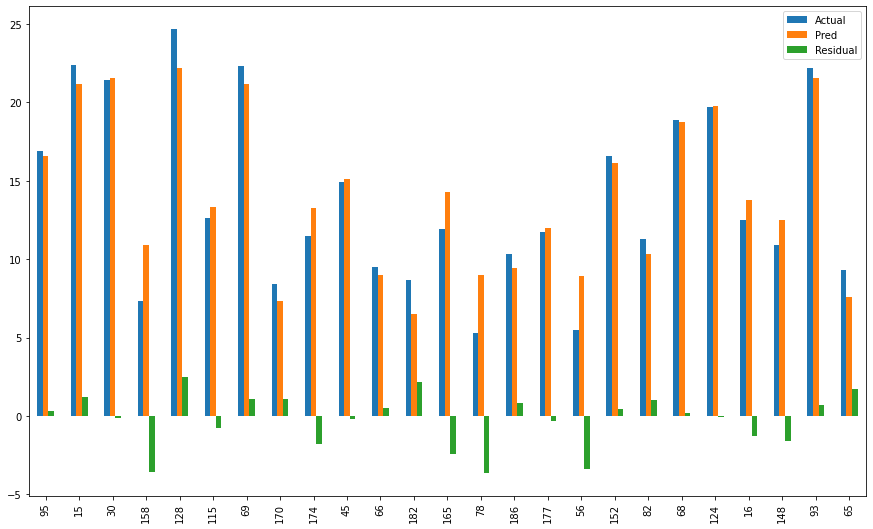

In [22]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show();

## Error Metrics

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549084

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [27]:
rmse = mse**0.5 #np.sqrt(mse)
rmse

1.9485372043446387

In [28]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [29]:
# This method is used to calculate the error rate as a percentage

mae / sales_mean

0.10780311802138763

In [30]:
# But mostly rmse is used

rmse / sales_mean

0.13895790367941796

## Adjusted R2 score 

In [90]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [91]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

## What is the concept of punishment for RMSE error metric?

In [92]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [93]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [94]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [95]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [96]:
#mae
df_2.residual.sum()/5 #200

200.0

In [97]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

209.76176963403032

 If there are huge differences between mae and rmse, you have uneffective predictions.

## Evaluation Model

In [98]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [99]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [100]:
y_train_pred = model.predict(X_train)

In [101]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


- I extracted the eval metric values of my train data that I trained my model on. I will compare it with the eval metric values of my test data.

## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [102]:
residuals = y_test-y_pred

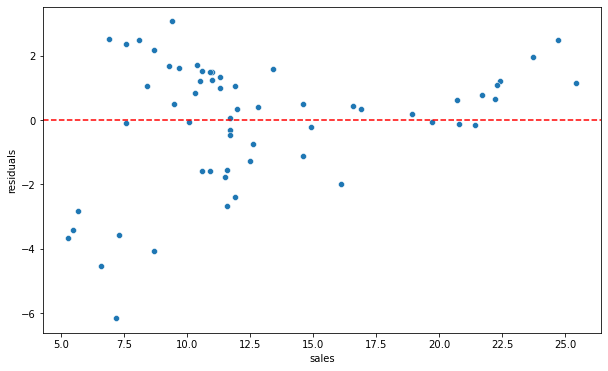

In [103]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

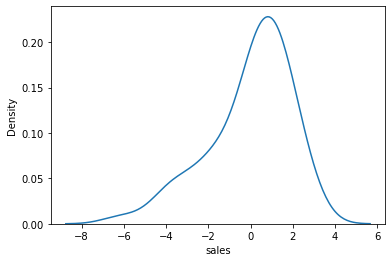

In [104]:
sns.kdeplot(residuals);

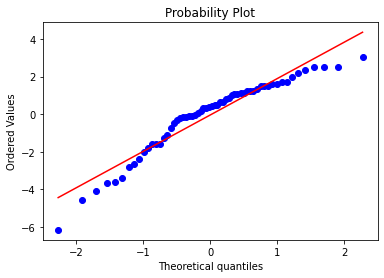

In [105]:
# If it is like an ivy, the data is suitable for modelling

stats.probplot(residuals, dist ="norm", plot =plt);

In [106]:
from scipy.stats import skew
skew(residuals)

-0.9865673346742742

In [107]:
#pip install yellowbrick

In [108]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/Users/onurhanaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py)

## Prediction Error for Linear Regression

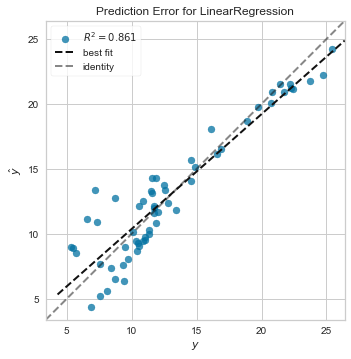

In [60]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [109]:
final_model = LinearRegression()

In [110]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [111]:
final_model.coef_ # in order TV, radio, and newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [112]:
final_model.intercept_

2.9388893694594067

In [113]:
df.head()

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [114]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [115]:
coeff_df

,Coefficient
TV,0.046
radio,0.189
newspaper,-0.001


## Prediction on New Data

In [66]:
adv = [[150, 20, 15]]

In [67]:
adv

[[150, 20, 15]]

In [68]:
final_model.predict(adv)

array([13.55862413])

In [69]:
final_model.coef_ # What does a one-unit increase change in each coefficient?

array([ 0.04576465,  0.18853002, -0.00103749])

In [70]:
final_model.intercept_

2.9388893694594085

In [71]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [73]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [74]:
final_model.predict(adv_2) 

array([13.55862413, 14.01627059])

In [75]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [76]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [93]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [79]:
6.864697 / 13.55862413

0.5062974630892729

In [80]:
3.770600 / 13.55862413

0.2780960637191142

In [83]:
-0.015562 / 13.55862413

-0.0011477565755043907